In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz
from scipy.stats import linregress

# files

In [2]:
abs_5nm= pd.read_csv('QY files for sample 3 and 4/small nps 5 nm.csv')
fluorescence_file= pd.read_csv('QY files for sample 3 and 4/fluorescence ref, bp and sp.csv', sep= '\t')
abs_ref= pd.read_csv('QY files for sample 3 and 4/reference sample correct measurments.csv')
abs_100nm= pd.read_csv('QY files for sample 3 and 4/big nps .csv')
abs_ref

,800,0.04609622434,800.1,0.04417229444,800.2,0.04893506691,800.3,0.04465191066,800.4,0.04833769798,800.5,0.04805696011,Unnamed: 12
0,799,0.046021,799,0.043823,799,0.048614,799,0.044099,799,0.048170,799,0.047855,NaN
1,798,0.045691,798,0.043962,798,0.048626,798,0.043778,798,0.048098,798,0.047973,NaN
2,797,0.045170,797,0.043286,797,0.048567,797,0.043659,797,0.047752,797,0.047462,NaN
3,796,0.045550,796,0.043636,796,0.048252,796,0.044004,796,0.048216,796,0.047575,NaN
4,795,0.045797,795,0.043718,795,0.048482,795,0.043879,795,0.048446,795,0.047762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,304,0.063599,304,0.057306,304,0.053402,304,0.051395,304,0.070212,304,0.069149,NaN
496,303,0.066625,303,0.059931,303,0.055063,303,0.053762,303,0.072241,303,0.072090,NaN
497,302,0.065373,302,0.058452,302,0.054729,302,0.053058,302,0.072311,302,0.070340,NaN
498,301,0.067327,301,0.059895,301,0.056627,301,0.053735,301,0.073089,301,0.071486,NaN


In [3]:
baseline_water= fluorescence_file['Spectrum15[]']
baseline_methanol= fluorescence_file['Spectrum16[]']

# absorption

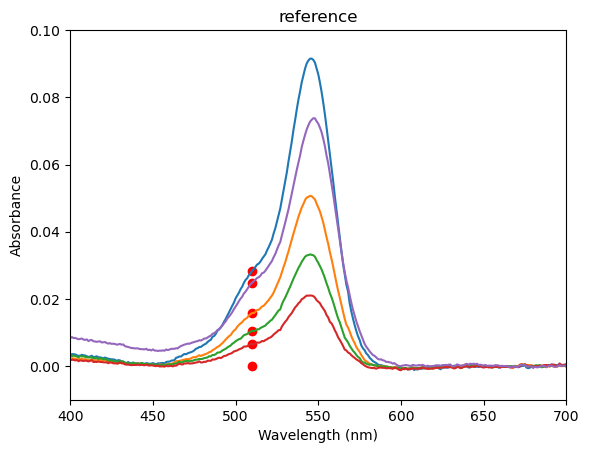

[0, 0.006578541339803921, 0.010476516225294115, 0.01582495363980392, 0.024800353121960786, 0.028371708654117644]


In [4]:
wavelength_ref = np.array([abs_ref.iloc[:, 0], abs_ref.iloc[:, 2], abs_ref.iloc[:, 4], abs_ref.iloc[:, 6], abs_ref.iloc[:,8] ])
absorbance_ref = np.array([abs_ref.iloc[:, 1], abs_ref.iloc[:, 3], abs_ref.iloc[:, 5], abs_ref.iloc[:, 7], abs_ref.iloc[:,9]])


for i in range(len(wavelength_ref)):
    baseline_range = (wavelength_ref[i] >= 650) & (wavelength_ref[i] <= 700)
    baseline = np.mean(absorbance_ref[i][baseline_range])
    absorbance_ref[i] -= baseline
    
absorbance_at_510_ref = [0]

for i in range(len(wavelength_ref)):
    for j in range(len(wavelength_ref[i])):
        if wavelength_ref[i][j] == 510:
            absorbance_at_510_ref.append(absorbance_ref[i][j])

for i in range(len(wavelength_ref)):
    plt.plot(wavelength_ref[i], absorbance_ref[i])

plt.ylim(-0.01,0.1)
plt.xlim(400,700)   
plt.scatter([510]*len(absorbance_at_510_ref), absorbance_at_510_ref, color='red', label='Absorbance at 510 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('reference')
plt.show()

absorbance_at_510_ref.sort()
print(absorbance_at_510_ref)

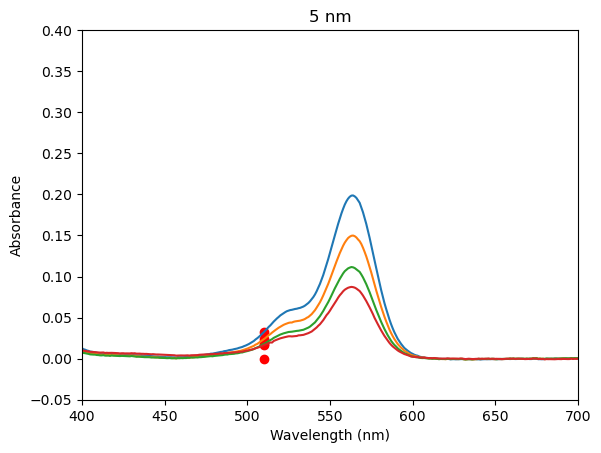

[0, 0.01647037441118812, 0.01800593693425743, 0.0237076410109901, 0.03218913613574258]


In [5]:
wavelength_5nm = np.array([ abs_5nm.iloc[:, 2], abs_5nm.iloc[:, 4], abs_5nm.iloc[:, 6], abs_5nm.iloc[:,8]])
absorbance_5nm = np.array([abs_5nm.iloc[:, 3], abs_5nm.iloc[:, 5], abs_5nm.iloc[:, 7], abs_5nm.iloc[:,9]])

baseline_values = [0]

for i in range(len(wavelength_5nm)):
    baseline_range = (wavelength_5nm[i] >= 600) & (wavelength_5nm[i] <= 700)
    baseline = np.mean(absorbance_5nm[i][baseline_range])
    absorbance_5nm[i] -= baseline
    baseline_values.append(baseline)


absorbance_at_510_5nm = [0]

for i in range(len(wavelength_5nm)):
    for j in range(len(wavelength_5nm[i])):
        if wavelength_5nm[i][j] == 510:
            absorbance_at_510_5nm.append(absorbance_5nm[i][j])

for i in range(len(wavelength_5nm)):
    plt.plot(wavelength_5nm[i], absorbance_5nm[i])

plt.ylim(-0.05,0.4)
plt.xlim(400,700)   
plt.scatter([510]*len(absorbance_at_510_5nm), absorbance_at_510_5nm, color='red', label='Absorbance at 510 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('5 nm')
plt.show()

absorbance_at_510_5nm.sort()
print(absorbance_at_510_5nm)


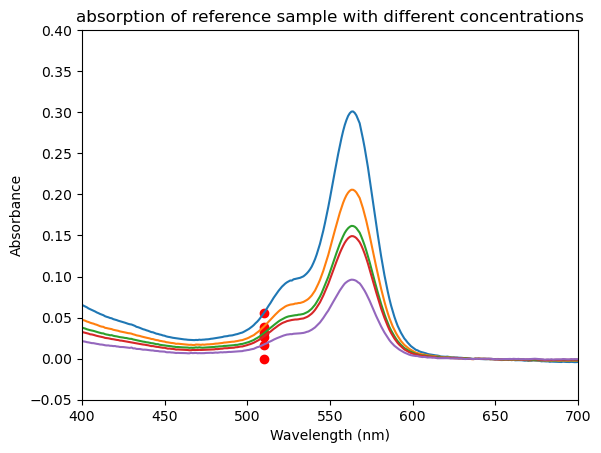

[0, 0.01708074851306931, 0.026941063711980212, 0.03085282905782178, 0.03892510210504951, 0.055410477296930695]


In [6]:
wavelength_100nm = np.array([abs_100nm.iloc[:, 0], abs_100nm.iloc[:, 2], abs_100nm.iloc[:, 4], abs_100nm.iloc[:, 6], abs_100nm.iloc[:,8]])
absorbance_100nm = np.array([abs_100nm.iloc[:, 1], abs_100nm.iloc[:, 3], abs_100nm.iloc[:, 5], abs_100nm.iloc[:, 7], abs_100nm.iloc[:,9]])

baseline_values = [0]

for i in range(len(wavelength_100nm)):
    baseline_range = (wavelength_100nm[i] >= 600) & (wavelength_100nm[i] <= 700)
    baseline = np.mean(absorbance_100nm[i][baseline_range])
    absorbance_100nm[i] -= baseline
    baseline_values.append(baseline)


absorbance_at_510_100nm = [0]

for i in range(len(wavelength_100nm)):
    for j in range(len(wavelength_100nm[i])):
        if wavelength_100nm[i][j] == 510:
            absorbance_at_510_100nm.append(absorbance_100nm[i][j])

for i in range(len(wavelength_100nm)):
    plt.plot(wavelength_100nm[i], absorbance_100nm[i])

plt.ylim(-0.05,0.4)
plt.xlim(400,700)   
plt.scatter([510]*len(absorbance_at_510_100nm), absorbance_at_510_100nm, color='red', label='Absorbance at 510 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('absorption of reference sample with different concentrations')
plt.show()

absorbance_at_510_100nm.sort()
print(absorbance_at_510_100nm)

# emission

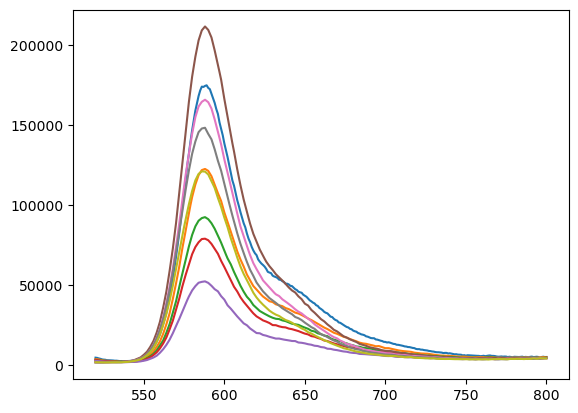

In [7]:
wavelength_fluorescence= fluorescence_file['Wavelength[nm]']

spectrum_columns_bp = ['Spectrum1[]','Spectrum2[]', 'Spectrum3[]', 'Spectrum4[]', 'Spectrum5[]']
 
    
spectrum_columns_reference= ['Spectrum6[]','Spectrum7[]', 'Spectrum8[]','Spectrum9[]', 'Spectrum10[]']

spectrum_columns_sp=['Spectrum11[]','Spectrum12[]', 'Spectrum13[]', 'Spectrum14[]']


spectrum_list= [spectrum_columns_bp,spectrum_columns_sp ]

spectrum_list = [spectrum_columns_bp, spectrum_columns_sp]

for spectrum in spectrum_list:
    for column in spectrum:
        plt.plot(wavelength_fluorescence, fluorescence_file[column])


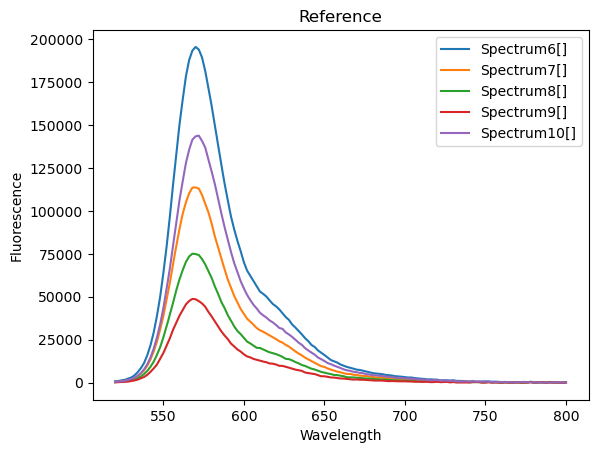

[0, 2408596.01065, 3742892.09855, 5676821.3548, 7306396.930000001, 9779149.71205]


In [8]:
area_reference = [0]

for spectrum_column in spectrum_columns_reference:
    spectrum_data = fluorescence_file[spectrum_column].copy()
    
    spectrum_data -= baseline_methanol
    

    area_ref = np.trapz(spectrum_data, wavelength_fluorescence)
    area_reference.append(area_ref)
    
    plt.plot(wavelength_fluorescence, spectrum_data, label=spectrum_column)
    

plt.xlabel('Wavelength')
plt.ylabel('Fluorescence')
plt.title('Reference')
plt.legend()
plt.show()
area_reference.sort()
print(area_reference)

[0, 6213277.25055, 7578823.11395, 8552703.6022, 10908690.162800001]


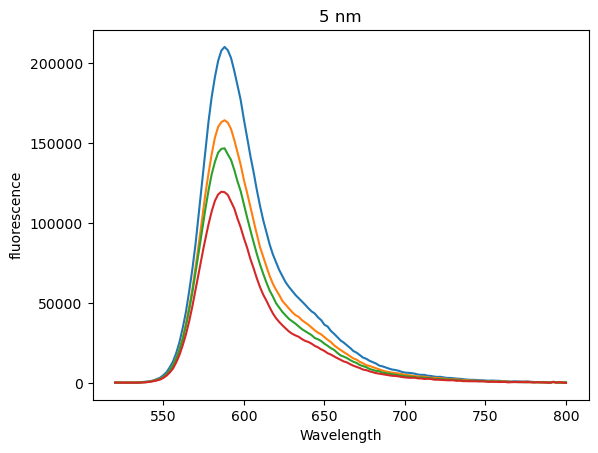

In [9]:
areas_5nm= [0]

for spectrum_column in spectrum_columns_sp:
    fluorescence_data= fluorescence_file[spectrum_column].copy()
    fluorescence_data= fluorescence_data - baseline_water
    
    
    area_5nm= np.trapz(fluorescence_data, wavelength_fluorescence)
    areas_5nm.append(area_5nm)
  
    plt.plot(wavelength_fluorescence, fluorescence_data, label=spectrum_column)
    
    
    
plt.xlabel('Wavelength')
plt.ylabel('fluorescence')
plt.title('5 nm')
areas_5nm.sort()
print(areas_5nm)


[0, 2896387.5907500004, 4417567.06415, 5229096.05405, 6912739.209099999, 9944009.552099999]


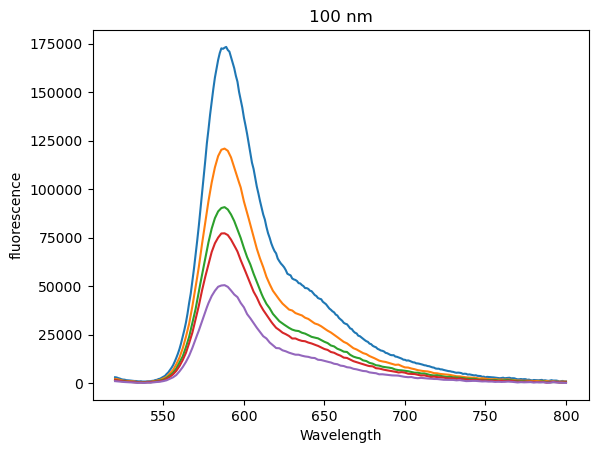

In [10]:
areas_100nm=[0]
for spectrum_column in spectrum_columns_bp:
    fluorescence_data_bp = fluorescence_file[spectrum_column].copy()
    
    fluorescence_data_bp -= baseline_water
    
    area_bp = np.trapz(fluorescence_data_bp,wavelength_fluorescence)
    areas_100nm.append(area_bp)
    
    plt.plot(wavelength_fluorescence, fluorescence_data_bp, label=spectrum_column)

areas_100nm.sort()
    
plt.xlabel('Wavelength')
plt.ylabel('fluorescence')
plt.title('100 nm')
print(areas_100nm)

# final results

320477857.7397627


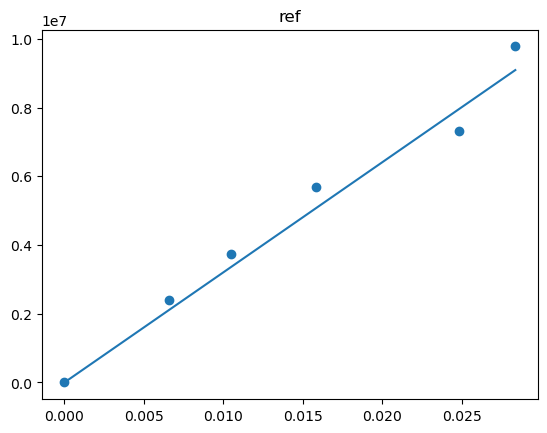

In [11]:
plt.scatter(absorbance_at_510_ref, area_reference)
slope_ref, _ = np.polyfit(absorbance_at_510_ref, area_reference, 1)
plt.plot(absorbance_at_510_ref, slope_ref* np.array(absorbance_at_510_ref))
plt.title('ref')


print(slope_ref)

342115811.1854647


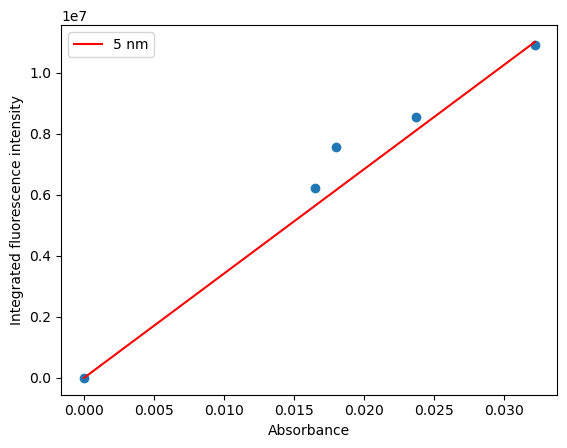

In [12]:
plt.scatter(absorbance_at_510_5nm, areas_5nm)
slope_5nm, _ = np.polyfit(absorbance_at_510_5nm, areas_5nm, 1)
plt.plot(absorbance_at_510_5nm, slope_5nm* np.array(absorbance_at_510_5nm), color='red', label='5 nm')
plt.legend()
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')
print(slope_5nm)

179914158.92023078


Text(0, 0.5, 'Integrated fluorescence intensity')

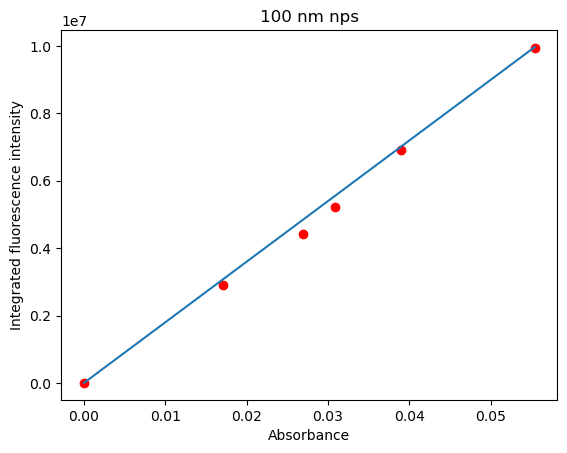

In [13]:
plt.scatter(absorbance_at_510_100nm, areas_100nm, color='red')
slope_100nm, _ = np.polyfit(absorbance_at_510_100nm, areas_100nm, 1)
plt.plot(absorbance_at_510_100nm, slope_100nm* np.array(absorbance_at_510_100nm))
plt.title('100 nm nps')
print(slope_100nm)
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')

In [14]:
np.shape(areas_100nm)

(6,)

(-5.0, 80.0)

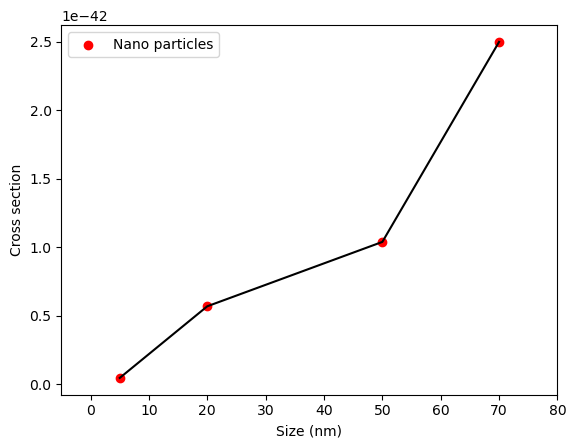

In [15]:
size= [5, 20, 50, 70]
cross_section=[4.7*10**-44, 5.7*10**-43, 1.04*10**-42, 2.5*10**-42]

plt.scatter(size, cross_section, color='r', label='Nano particles')
plt.plot(size, cross_section, color= 'black')
plt.xlabel('Size (nm)')
plt.ylabel('Cross section')

plt.legend()
plt.xlim(-5,80)

# figures used in the project

# 70 nm

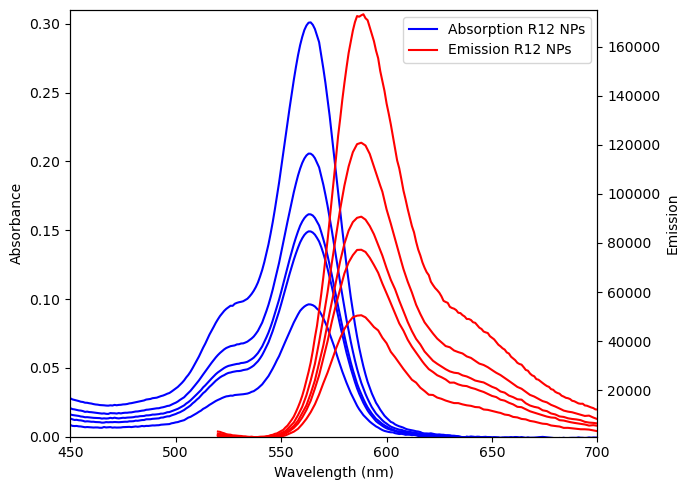

In [47]:
fig, ax1 = plt.subplots(1, figsize=(7, 5))
ax2 = ax1.twinx()

# Plot absorption data
for i in range(len(wavelength_100nm)):
    ax1.plot(wavelength_100nm[i], absorbance_100nm[i], color='blue')

# Add one label for absorption data
abs_line, = ax1.plot([], [], color='blue', label='Absorption R12 NPs')

ax1.set_ylim(0, 0.31)
ax1.set_xlim(450, 700)
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance')

# Plot emission data
for spectrum_column in spectrum_columns_bp:
    fluorescence_data_bp = fluorescence_file[spectrum_column].copy()
    fluorescence_data_bp -= baseline_water
    ax2.plot(wavelength_fluorescence, fluorescence_data_bp, color='red')

# Add one label for emission data
em_line, = ax2.plot([], [], color='red', label='Emission R12 NPs')

ax2.set_ylabel('Emission')
ax2.set_ylim(1000,175000)
# Combine legends
lines = [abs_line, em_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()


# reference

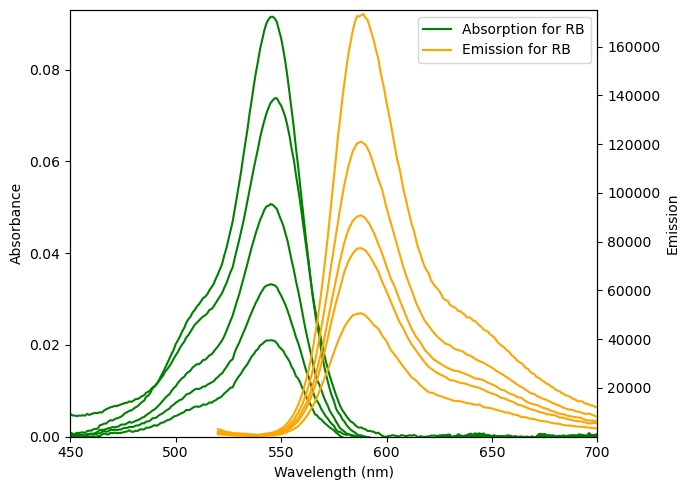

In [50]:
fig, ax1 = plt.subplots(1, figsize=(7, 5))
ax2 = ax1.twinx()

# Plot absorption data
for i in range(len(wavelength_ref)):
    ax1.plot(wavelength_ref[i], absorbance_ref[i], color='green')

# Add one label for absorption data
abs_line, = ax1.plot([], [], color='green', label='Absorption for RB')

ax1.set_ylim(0, 0.093)
ax1.set_xlim(450, 700)
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance')

# Plot emission data
for spectrum_column in spectrum_columns_bp:
    fluorescence_data_ref = fluorescence_file[spectrum_column].copy()
    fluorescence_data_ref -= baseline_methanol
    ax2.plot(wavelength_fluorescence, fluorescence_data_ref, color='orange')

# Add one label for emission data
em_line, = ax2.plot([], [], color='orange', label='Emission for RB')

ax2.set_ylabel('Emission')
ax2.set_ylim(0.1000,175000)

# Combine legends
lines = [abs_line, em_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()


<ErrorbarContainer object of 3 artists>

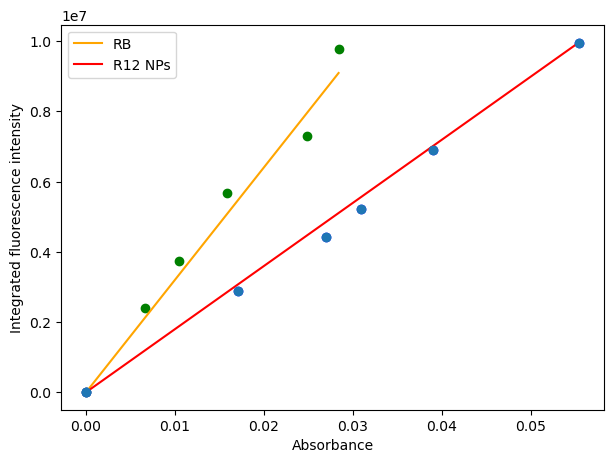

In [70]:
plt.figure(figsize=(7,5))
plt.scatter(absorbance_at_510_ref, area_reference, color='green')

plt.plot(absorbance_at_510_ref, slope_ref* np.array(absorbance_at_510_ref), color='orange', label='RB')
plt.scatter(absorbance_at_510_100nm, areas_100nm, color='blue')

plt.plot(absorbance_at_510_100nm, slope_100nm* np.array(absorbance_at_510_100nm), color='r', label='R12 NPs')
# plt.title('Integrated fluorescence intensity and absorbance values for ')
plt.legend()



plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')




y_error = np.linspace(0.01, 1, 6)

plt.errorbar(absorbance_at_510_100nm, areas_100nm, yerr = y_error, fmt ='o')
